<a href="https://colab.research.google.com/github/vbipin/aip/blob/master/kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
In this notebook we create a simple kmeans algorithm for 2d points.
This is mainly for understanding the algorithm itself.
"""
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [10]:
import random
from collections import defaultdict


def init_cluster_centers( X, k) :
    """From the data points in X selcts k points randomly as intial center points"""
    cluster_centers = random.sample( X, k )
    return cluster_centers

#find the distance from cluster centers to all the points.
def distance_to_cluster_centers(X, cluster_centers) :
    """We return a list of lists"""
    #list[0] is the distance to all the centers for point 0, list[1] of X[1]...
    return [ [ euclidean(c, x) for c in cluster_centers] for x in X ]


def cluster_mean( list_of_points ) :
    """we assume 2d points"""
    N = len(list_of_points)
    x_mean = sum([p[0] for p in list_of_points])/N #summing up the x dimention and divide by N
    y_mean = sum([p[1] for p in list_of_points])/N
    return x_mean, y_mean

#This is one iteration of the loop of the algorithm
#we need to run this many times until convergence
def kmeans_iteration( X, cluster_centers, debug=True ) :
    """One iterationof the kmeans loop; return new_center_points"""
    
    #for each point we find the distance to all the centers. (list of list)
    distance_list = distance_to_cluster_centers(X, cluster_centers)
    
    #We are finding which center the point is nearest to. 
    #dlist.index(min(dlist)) ->
    #  here dlist has the distance of a single point to all the cluster centers
    #  min(dlist) gives the shortest distance; 
    #  dlist.index(...) gives the index of the cluster that min value belongs.
    #we just store the index of the cluster
    #the center_idx has as many elements as in X
    center_idx = [ dlist.index(min(dlist)) for dlist in distance_list ]
    
    #here we create a dictionary that maps center-index to the list of points
    # eg: { 0:[p1,p3,p4], 1:[p2,p5]}
    clusters = defaultdict(list)
    for i,c in enumerate(center_idx) : #i is the index of the point, c is the index of its nearest cluster center.
        clusters[c].append(X[i]) #for each cluster index, add the point
    
    if debug :  #only when we are debugging
        #plot all the clusters
        plot_clusters(clusters)
        #plot the center means
        plot_cluster_centers( cluster_centers )
        plt.show()
    
    #Now we need to calculate the new center points by averaging each cluster (taking mean)
    cluster_centers = [ cluster_mean(clusters[c]) for c in clusters ]
    
    
    return cluster_centers, clusters



#this is a sample distance function
def euclidean(a,b) :
    #return math.sqrt( (a[0]-b[0])**2 + (a[1]-b[1])**2  )
    return np.linalg.norm(np.array(a)-np.array(b))

#some utils for plotting
#ref: https://python-graph-gallery.com/131-custom-a-matplotlib-scatterplot/
#ref: https://matplotlib.org/3.3.0/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py
def plot_clusters( clusters ) :
    """clusters is a dict {0:[p,p,p], 1:[p,p]...}"""
    #fig = plt.subplot()
    for cluster in clusters.values() : #values are list of points
        plot_2d( cluster)
        
def plot_cluster_centers( cluster_centers) :
    #we show the cluster centers in black and as a triangle.
    plot_2d( cluster_centers, 'black', '^')
        
def plot_2d( X, color=None, marker=None ) :
    #data assumed to be 2d
    x_values = [ t[0] for t in X] #take the x coordinates
    y_values = [ t[1] for t in X] #take the y coordinates
    if color :
        plt.scatter(x_values, y_values, c=color, marker=marker)
    else :
        plt.scatter(x_values, y_values)

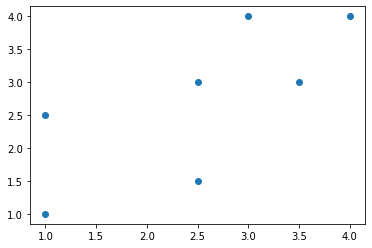

In [21]:
#Lets create some test data
X = [(1,1), (2.5,1.5), (1,2.5),  (3,4), (3.5,3), (4,4), (2.5,3)]
#X = [(1,1), (0.5,1.5), (1,2.5),  (3,4), (3.5,3), (4,4), (2.5,3), (2.5,5), (1,4)]

#fig = plt.subplot()
#plt.xlim(0,5) #set the range of x and y values of the plots
#plt.ylim(0,5)
plot_2d(X)

In [22]:
#initialize random cluster centers
cluster_centers = init_cluster_centers( X, k=2)

#plot_2d(X)
#plot_cluster_centers(cluster_centers) #initial centers will overlap with existing points

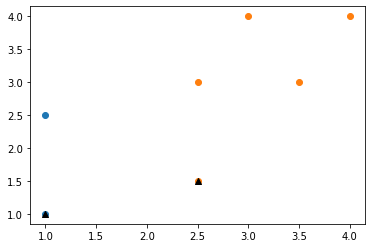

In [23]:
#can run this cell many times until convergence
#cluster centers are the black triangles. points are colored according to the current cluster they belong

#plot_cluster_centers(cluster_centers)

old_c = cluster_centers
cluster_centers, clusters = kmeans_iteration(X, cluster_centers) #i have put the plotting inside the function for convenience 

#plot_clusters(clusters)

In [24]:
#Are we done??
cluster_centers == old_c

#If not 
#   go back to iteration and run again

False

In [25]:
#here is the loop as a function
def kmeans_clustering( X ) :
    """returns the centers and clusters dictionary"""
    #Initialize the center points
    cluster_centers = init_cluster_centers( X, k=2)
    
    while True :
        old_c = cluster_centers #take a backup
        cluster_centers, clusters = kmeans_iteration(X, cluster_centers) #this is one iteration
        
        if old_c == cluster_centers :
            break
            
    return cluster_centers, clusters

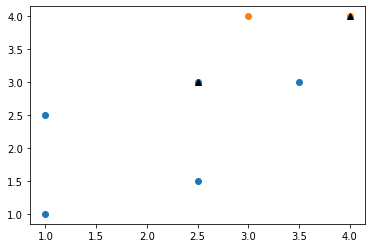

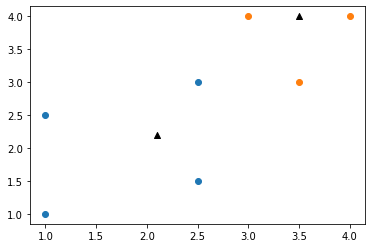

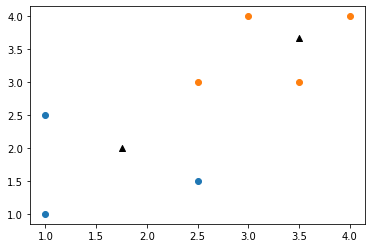

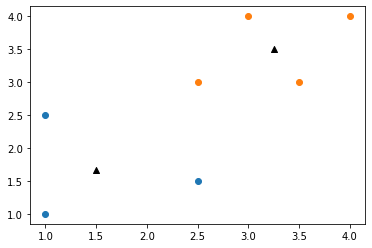

In [30]:
c,a = kmeans_clustering( X )